Aprendizado data science

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [9]:
import os
print(os.listdir("../input"))
import pandas as pd

notas = pd.read_csv("../input/movie-lens-small-latest-dataset/ratings.csv")
notas.head()

['movie-lens-small-latest-dataset', 'tmdb-movie-metadata']


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas.shape

(100836, 4)

In [11]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [13]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [14]:
notas['nota'].mean()

3.501556983616962

In [15]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
5         3.0
6         5.0
7         4.0
8         5.0
9         5.0
10        5.0
11        5.0
12        3.0
13        5.0
14        4.0
15        5.0
16        3.0
17        3.0
18        5.0
19        4.0
20        4.0
21        5.0
22        4.0
23        3.0
24        4.0
25        5.0
26        4.0
27        3.0
28        5.0
29        4.0
         ... 
100806    3.0
100807    4.0
100808    4.0
100809    3.5
100810    3.5
100811    5.0
100812    4.5
100813    4.0
100814    5.0
100815    3.5
100816    3.5
100817    3.0
100818    3.0
100819    3.0
100820    2.5
100821    4.5
100822    3.0
100823    3.0
100824    4.0
100825    4.0
100826    3.5
100827    3.5
100828    3.5
100829    5.0
100830    4.0
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

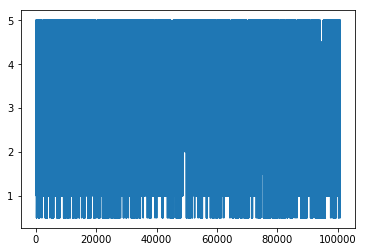

In [16]:
notas.nota.plot()

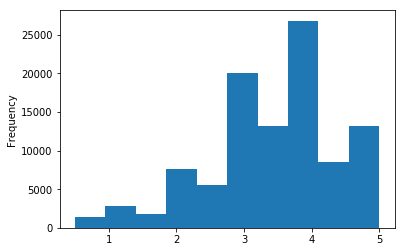

In [17]:
notas.nota.plot(kind="hist")

In [18]:
print(notas['nota'].mean())
print(notas['nota'].median())

3.501556983616962
3.5


In [19]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

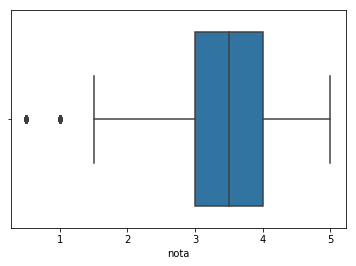

In [20]:
import seaborn as sns

sns.boxplot(notas.nota)
notas.nota.describe()

In [21]:
notas.nota.mean()

3.501556983616962

In [22]:
filmes = pd.read_csv("../input/movie-lens-small-latest-dataset/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
notas_filme = notas.query("filmeId == 1").nota
media = notas.query("filmeId == 1").nota.mean()
print(media)
print(notas_filme)

3.9209302325581397
0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
1772     3.5
2274     4.0
3219     3.5
4059     3.0
4879     5.0
4929     3.0
5031     3.0
5555     5.0
6315     5.0
6429     3.0
6477     4.0
6876     5.0
7112     3.0
7931     3.0
8035     5.0
9157     5.0
9428     4.0
9979     4.0
10360    2.5
11728    5.0
11808    4.5
12264    0.5
12412    4.0
12730    2.5
13402    4.0
        ... 
84327    3.0
84603    3.0
84780    4.0
85291    4.0
85984    5.0
86124    3.0
86582    4.0
87087    4.5
87791    3.5
88219    4.0
88522    4.0
88677    5.0
89243    4.0
89316    3.0
89904    5.0
90256    5.0
90517    4.0
91748    4.0
92159    4.0
92623    3.0
95101    2.5
95864    4.0
96100    4.0
97043    3.0
97143    4.0
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64


In [24]:
media_por_filme = notas.groupby("filmeId").mean().nota
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

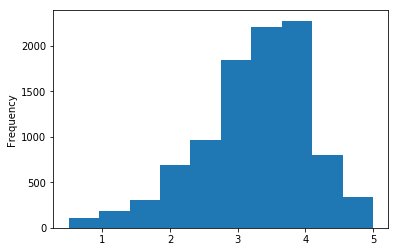

In [25]:
media_por_filme.plot(kind="hist")

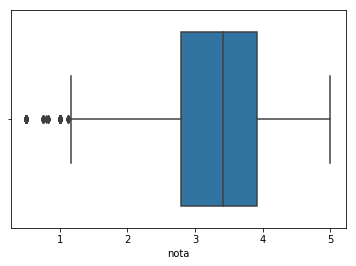

In [26]:
sns.boxplot(media_por_filme)

In [27]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

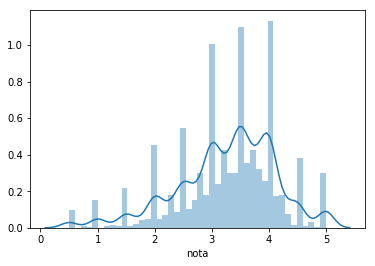

In [28]:
sns.distplot(media_por_filme)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

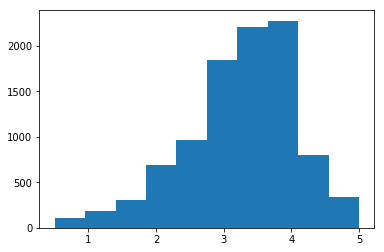

In [29]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)

In [30]:
import pandas as pd

tmdb = pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [6]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["lingua_original", "total"]
contagem_de_lingua.head()

,lingua_original,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


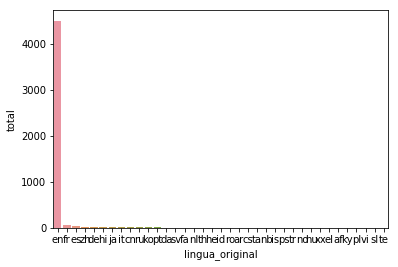

In [31]:
sns.barplot(x = "lingua_original", y = "total", data = contagem_de_lingua)

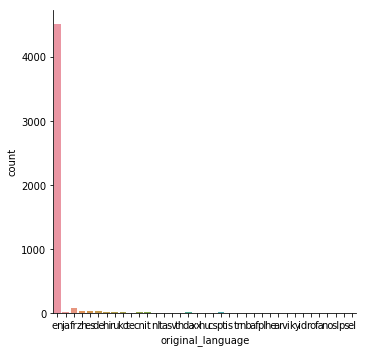

In [35]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f602f4ef6d8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

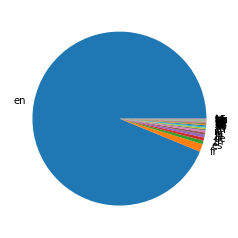

In [38]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua["lingua_original"])

In [40]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc["en"]
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [43]:
dados = {
    'lingua' : ['ingles','outros'],
    'total' : [total_de_ingles, total_do_resto]

}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


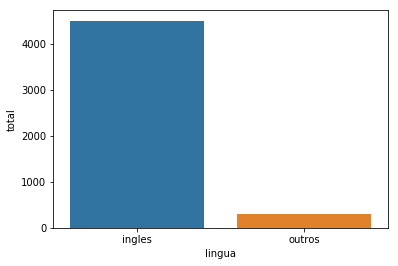

In [44]:
sns.barplot(data = dados, x = 'lingua', y = 'total')

In [47]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_por_lingua_de_outros_filmes

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ar     2
cs     2
id     2
ta     2
ro     2
hu     1
af     1
no     1
tr     1
te     1
nb     1
xx     1
pl     1
vi     1
el     1
is     1
sl     1
ky     1
ps     1
Name: original_language, dtype: int64

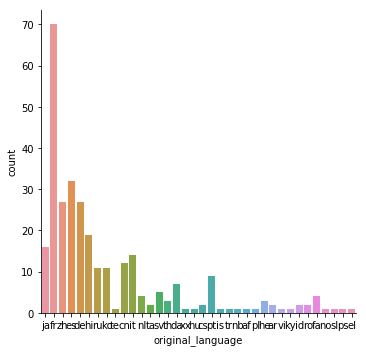

In [48]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", data = filmes_sem_lingua_original_em_ingles, kind="count")

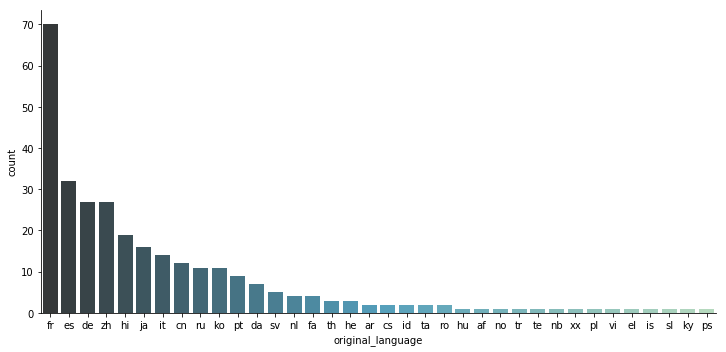

In [50]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles, 
            palette = "GnBu_d", aspect = 2, order = total_por_lingua_de_outros_filmes.index)

In [95]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))
print("Nota média do Toy Story {:.2f}".format(notas_do_toy_story.nota.mean()))
print("Nota média do Jumanji {:.2f}".format(notas_do_jumanji.nota.mean()))
print("Desvio padrão Toy Story", notas_do_toy_story.nota.std(), "Desvio padrão Jumanji", notas_do_jumanji.nota.std())

215 110
Nota média do Toy Story 3.92
Nota média do Jumanji 3.43
Desvio padrão Toy Story 0.8348591407114045 Desvio padrão Jumanji 0.8817134921476455


In [93]:
print("Nota mediana do Toy Story {:.2f}".format(notas_do_toy_story.nota.median()))
print("Nota mediana do Jumanji {:.2f}".format(notas_do_jumanji.nota.median()))


Nota mediana do Toy Story 4.00
Nota mediana do Jumanji 3.50
0.8348591407114045 0.8817134921476455


{'whiskers': [<matplotlib.lines.Line2D at 0x7f602ee4d630>,
 'caps': [<matplotlib.lines.Line2D at 0x7f602ee4dcc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f602ee4d4e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f602ee58390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f602ee586d8>,
 'means': []}

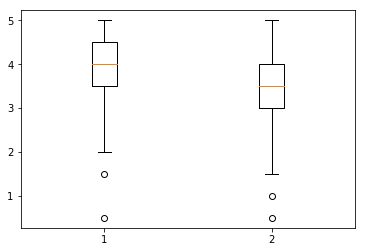

In [87]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

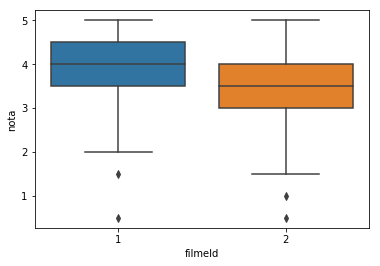

In [88]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2)"))

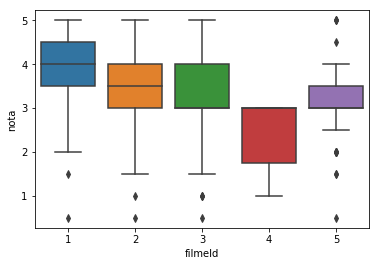

In [89]:
sns.boxplot(x = "filmeId", y = "nota", data = notas.query("filmeId in (1,2,3,4,5)"))

In [92]:
print("Desvio padrão do Jumanji {:.2f}".format(notas_do_jumanji.nota.std()), "Desvio padrão do Toy Story {:.2f}".format(notas_do_toy_story.nota.std()))

Desvio padrão do Jumanji 0.88 Desvio padrão do Toy Story 0.83
